## Portfolio Optimization

* Portfolio optimization models look for the optimal way to make investments. 
  * Usually investors expect either a maximum return for a given level of risk or a given return for a minimum risk so these models are typically based on two criteria: **maximization of the expected return and/or minimization of the risk**.

### Some Notation

* expected return: 
$$\mathbb{E}(R_{p}) = \sum _{i}w_{i} \mathbb{E}(R_{i}) = \mathbf{w}\cdot \mathbf{R} =
\begin{bmatrix}
w_1 \\ 
w_2 \\ 
\vdots \\
w_n
\end{bmatrix}
\begin{bmatrix}
\mathbb{E}(R_1) & \mathbb{E}(R_2) & \cdots & \mathbb{E}(R_n)
\end{bmatrix}$$
(with $\sum_{i}w_i = 1$ and $0 \le w_i \le 1$);


In [ ]:
import numpy as np

w = np.array([0.1, 0.2, 0.5, 0.05, 0.1])
R = np.array([0.239188, 0.415127, 0.263797, 0.172818, 0.528046])

print (w.dot(R))
print (np.dot(w, R))


0.3002882
0.3002882


* portfolio return variance:
  $$ \sigma _{p}^{2} = \sum _{i}\sum _{j}w_{i}w_{j}\sigma _{ij} = \mathbf{w}^T\Sigma\mathbf{w} =
\begin{bmatrix}
w_1 \\ 
w_2 \\ 
\vdots \\
w_n
\end{bmatrix}
\begin{bmatrix}
\sigma_{11} & \sigma_{12} & \cdots & \sigma_{1n} \\
\sigma_{21} & \sigma_{22} & \cdots & \sigma_{2n} \\
\vdots & & \\
\sigma_{n1} & \sigma_{n2} & \cdots & \sigma_{nn} \\
\end{bmatrix}
\begin{bmatrix}
w_1 & w_2 & \cdots & w_n
\end{bmatrix} = 
\begin{bmatrix}
\sigma_{11} *w_1 + \sigma_{12} *w_2 + \cdots + \sigma_{1n}*w_n \\
\sigma_{21} *w_1 + \sigma_{22} *w_2  +\cdots + \sigma_{2n}*w_n \\
\vdots \\
\sigma_{n1} *w_1 + \sigma_{n2}*w_2 + \cdots + \sigma_{nn}*w_n \\
\end{bmatrix}
\begin{bmatrix}
w_1 & w_2 & \cdots & w_n
\end{bmatrix}\\[20 pt]
$$ 
  where
  $\Sigma = \sigma _{ij}=\sigma _{i}\sigma _{j}\rho _{ij}$ is the 
  covariance, $\rho_{ij}$ is the correlation coefficient;
* portfolio standard deviation:
  $$ \sigma _{p}= \sqrt{\sigma _{p}^{2}}$$

In [ ]:
import numpy as np

w = np.array([0.1, 0.2, 0.5, 0.05, 0.1])
Sigma = np.array([[0.051902, 0.025037, 0.025737, 0.022454, 0.027760],
                  [0.025037, 0.085839, 0.041025, 0.039501, 0.048412],
                  [0.025737, 0.041025, 0.069550, 0.036127, 0.044528],
                  [0.022454, 0.039501, 0.036127, 0.051797, 0.040390],
                  [0.027760, 0.048412, 0.044528, 0.040390, 0.178298]])

print (w.T.dot(Sigma.dot(w)))
print (np.dot(w.T, np.dot(Sigma, w)))


0.04520202250000001
0.04520202250000001



* Throughout this lesson we will use market data stored in [portfolio_data.csv](https://raw.githubusercontent.com/matteosan1/finance_course/develop/libro/input_files/portfolio_data.csv).


In [ ]:
# load the file
import pandas as pd


<img src="https://drive.google.com/uc?id=1XUa_cJF7C-I9ojge_bD3bfUx1fjHgKm2">

In [ ]:
# returns daily and annualized


In [ ]:
# covariance


### Modern Portfolio Theory (MPT)
* **Every portfolio is characterized by the asset weights**, hence any theory dealing with portfolio management have a recipe to "optimally" choose the weights.
* MPT model assumes an investor usually consider **expected return and variance in return**. Markowitz intuition was to estimate investment risk through portfolio variance  (i.e. since it measures the variability in realized return around the expected return). 
  * The latter characterizes not only the individual variability of the return on each investment, but also how each investment’s return tends to move with other investments. 

#### Efficient Portfolios
* There is no precise way for an investor to determine the “correct” trade off between risk and return 
  * generally higher expected return has to be paid with higher risk.

* Portfolio weights $w_i$ should be chosen such that it yields the highest return for a certain level of risk (or equivalently the lowest risk for a certain level of return)

$$\min\{\sigma_P^2\}= \underset{\mathbf{w}}{\min}\{\mathbf{w}^T\Sigma\mathbf{w}\}\quad\textrm{subjected to }\mathbf{w}\cdot\mathbf{R} = R_{target}$$

* The **efficient frontier** consists of the set of all efficient portfolios that yield the highest return for each level of risk.

In [ ]:
# markowitz

In [ ]:
# expected return


* The model recommends about 44% of the portfolio be invested in AAPL, about 10% in AMZN, 12% in FB and so on...
* The expected return is about 25% as required in the constraint, with a variance of about 0.036 (standard deviation of 0.19).

* We based the model simply on statistical data derived from daily returns. However it could be possible to use also information about its expected future performance.

* Draw the efficient frontier of return and risk.

In [ ]:
# efficient frontier


<img src="https://drive.google.com/uc?id=1UYXawAY5x7tfa26332L1FWj0Jyimm-7a">

### Criticisms to Markowitz Model

* The portfolio weights tend to be extremely sensitive to very small changes in the expected returns. For example, even a small increase in the expected return of just one asset can dramatically alter the optimal composition of the entire portfolio;
* the presence of heavy tails in the return distributions can result in significant errors in covariance estimates as well (return normality assumption).

### Portfolios with a Risk-Free Asset
* When one of the asset of the portfolio is risk free, then the efficient frontier has a particularly simple form: the *capital allocation line* (CAL). 

* The simplest example is a portfolio containing two assets: one risk-free with $\mathbb{E}[R_f] = 3\%$ (e.g. treasury bill) and one risky (e.g. a stock) with $\mathbb{E}[R_r] = 10\%$ and standard deviation $\sigma_r = 20\%$.
  * The question that needs to be answered for any individual investor is how much to invest in each of these assets

$$\mathbb{E}[R_p] = \mathbb{E}[R_f]\cdot w_f + \mathbb{E}[R_r] \cdot ( 1 − w_f )$$
where $w_f$ is the relative allocation to the risk-free asset.

$$\sigma_p = ( 1 − w_f ) \cdot \sigma_r$$

* If $w_f = 1$ the expected return would be 3% and the risk of the portfolio would be 0%. 
* If $w_f = 0$ would give an investor an expected return of 10% and a portfolio risk of 20%. 
* If $w_f=0.25$:

$$\mathbb{E}[R_p] = ( 3\% \cdot 25\% ) + ( 10\% \cdot 75\% ) = 0.75\% + 7.5\% = 8.25\%$$

$$\sigma_p = 75\%\cdot 20\% = 15\%$$

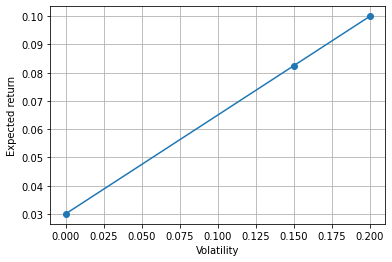

In [ ]:
from matplotlib import pyplot as plt
x = [0, 0.15, 0.20]
y = [0.03, 0.0825, 0.1]
plt.plot(x, y, marker='o')
plt.xlabel("Volatility")
plt.ylabel("Expected return")
plt.grid(True)
plt.show() 

* **The slope of this line measures the trade off between risk and return: a higher slope means that investors receive a higher expected return in exchange for taking on more risk**. 

In [ ]:
# CAL for the example
# last asset risk-free
import numpy as np
from scipy.optimize import minimize


<img src="https://drive.google.com/uc?id=16VmljWbK7dQtyPZi5CW6k-K_0KWiqhkY">

* **The efficient frontier has become a straight line, tangent to the
frontier of the risky assets only.** 

* When the target is 10% the entire investment is allocated to the
risk-free asset, as the target increases the fraction of the risky assets grows proportionally to the volatility.


### The Sharpe Ratio
* The goal of an investor is to find the portfolio that generates the steepest possible line when combined with a risk-free investment. 
  * **The slope of this line is called the Sharpe ratio of the portfolio;**
  * steepest line means highest return assuming the same level of risk.

* The Sharpe ratio is defined as:

$$\mathcal{S} = (R_p - r_0) / \sigma_p $$
  * with $R_p$ portfolio expected return, $\sigma_p$ portfolio standard deviation in return (risk), and $r_0$ the return of the risk-free asset.

* **Sharpe ratio measures how much additional return we achieved for the additional risk we took on, relative to putting all our money in a risk-free asset**.

* Assume you want to achieve a certain level of return $R_\textrm{target}$ with your portfolio, what is the fraction $w_p$ of your wealth to place in the risky part of the portfolio ?

$$ ( 1 - w_p ) * r_0 + w_p * R_p = R_\textrm{target}\\[5pt]$$

$$ w_p = \cfrac{( R_\textrm{target} – r_0)}{( R_p – r_0)}\\[5pt]$$

* The corresponding risk is

$$ w_p\cdot \sigma_p = \left[\cfrac{( R_\textrm{target} – r_0)}{(R_p – r_0)}\right]\cdot \sigma_p $$

* So if you want to minimize the portfolio risk you need to find:

$$ \min\left\{\left[\cfrac{(R_\textrm{target} – r_0)}{(R_p – r_0)}\right]\cdot \sigma_p\right\} = \min\left\{\cfrac{( R_\textrm{target} – r_0)}{\mathcal{S}}\right\}\\[5pt]$$

* But $R_\textrm{target}$ and $r_0$ are fixed so minimizing the above ratio is equivalent to maximize the Sharpe ratio:

$$ \min\left\{\cfrac{( R_\textrm{target} – r_0)}{\mathcal{S}}\right\} \implies\max\left\{\mathcal{S}\right\}\\[5pt]$$

* **The risky portfolio that maximizes the Sharpe ratio is the one that minimize the variance at the same time**.

In [ ]:
# Sharpe ratio optimization


<img src="https://drive.google.com/uc?id=1vrNSG5_-ACIkF3DuKxZ6wQXnOsN0C9yz">

* **The optimization using the Sharpe ratio gives a portfolio that is
on the minimum volatility efficient frontier, and gives the maximum
return relative to putting all our money in the risk-free asset**.

## Portfolio Diversification

* A security total risk can be divided into:
  * **unsystematic**, the risk portion peculiar to the company that can be diversified away;
  * **systematic**, the non-diversifiable portion that is related to the
movement of the stock market and is therefore unavoidable.

* **Diversification** is a common topic in portfolio construction and allows to combine risky stocks so that the resulting portfolio is less risky than the sum of its components. 
  * Unfortunately, perfect negative relationship between the returns is very rare in real world;
  * however diversification will always reduce risk;
  * empirical studies have demonstrated that risk can be virtually eliminated in portfolios of 30 to 40 randomly selected stocks. 

* When using the standard variation of the portfolio return as a measure of the risk, as in the Markowitz model, it is easy to show how diversification allows to reduce the risk (assume an equally weighted portfolio):

$$\sigma_P = \sqrt{0.5\sigma_1^2 + 0.5\sigma_2^2 + 2 \cdot 0.5\sigma_1 \cdot 0.5\sigma_2\cdot\rho_{12}} \lt  0.5\sigma_1 + 0.5\sigma_2$$

* The inequality holds unless $\rho_{12} = 1$, so in general, **for risk, the whole is less than the sum of its parts**. 


## Linear Models

* **Linear models** can be used whenever a *target variable* ($y$) can be described with a linear combination of one or more *independent variables* ($X$)

$$y = \beta_1 X_1 + \beta_2 X_2 + \ldots + \alpha$$

* In such models it is mandatory to avoid **collinearity** among the independent variables, which means each $X_i$ cannot be expressed as a linear combination of other $X_j$
  * i.e. they really must be independent !

* A model before becoming useful needs to be **calibrated**
  * need to find the model parameter values such that it explains at its best real data.
* Calibration of a linear model can be done with a **linear regression** using *ordinary least squares* (OLS) techinique.
  * OLS algorithm determine the model parameters such that the following is minimized

$$ \min_{\beta,\alpha}\sum_i (y_i - \tilde{y}_i)^2$$
where $\tilde{y}$ is the $y$ value predicted by the model.

<center>

![](https://drive.google.com/uc?id=1gy8nApIAucDZB17TFDZ5gFkgfKtACYgJ)

</center>

## Example

* Chinese Yuan (CNY) was pegged to the US Dollar (USD) prior to July 2005. 
* Then, China announced that the exchange rate would have been set with reference to a basket of other currencies, allowing for a movement of up to 0.3\% within any given day. 
  * The actual currencies and their basket weights were unannounced by China. 

<center>

![](https://drive.google.com/uc?id=1NaXDvRzEM876UQZKMFWejPcBOWK_NTcu)

</center>

1. For any given period, what is the implicit reference basket for the Chinese currency ?
2. Has the reference basket changed over time ?
3. Has the Chinese currency depreciated with respect to the dollar? If so, how much and when?

* We can assume that Yuan exchange was determined from a linear relationship with the currencies in the reference basket:

$$CNY = \beta_{EUR}EUR + \beta_{GBP} GBP + \ldots + \beta_{CND}CND + \alpha$$

* Consider the dataset [exchange_rates.csv](https://raw.githubusercontent.com/matteosan1/finance_course/develop/libro/input_files/exchange_rates.csv) containing daily currencies exchange rates in the 1999 to 2013 period.

* To apply this methodology the original dollar-based exchange rates have been converted using the Swiss Franc. This allows currency moves of the dollar to be used to explain moves in the Yuan. 
  * The choice of Swiss Franc is consistent with evaluations with respect to a stable currency.


In [ ]:
# load data
import pandas as pd


In [ ]:
# linear regression prior 2005-06-30
import statsmodels.api as sm



* From the detailed summary the most important information is:
  * **R-squared**: the closer to 1 the higher is the linear correlation between $y$ and $X$;
  
  * the 6 columns beside the parameter names:
    * coeff — The estimate of this model parameter (the weight assigned to this feature);
    * std err — The standard error of our estimate.

* From these two values we can compute the t-score of our estimate (third column):
$$ t = \frac{\textrm{coeff}}{\textrm{std err}}$$
  * It tells how small the error is with respect to the estimated value: **the larger the $t$-score, the smaller the error and the more confident we can be in our estimate**.
  * To better quantify our confidence, it’s usual to compute the associated $p$-value: 
    * we expect the $t$-score to follow a standard distribution and **the probability of obtaining results at least as extreme as the value observed is simply the area under the curve to the right of the $t$-score value** ($p$-value, the fourth column).

<center>

![](https://drive.google.com/uc?id=1FrKRa4fZtgUbwafnHctZVKKv25k2kRGv)

</center>

* The smaller the $p$-value, the stronger the evidence that the value we’re estimating is different than zero.
  * Typical thresholds for the $p$-value are:
    * $p<0.05$ — Moderate evidence
    * $p<0.01$ — Strong evidence
    * $p<0.001$ — Very strong evidence

* **In our example R-squared is 1, and the only largely significant predictor is USD ($p$-value 0) confirming that indeed CNY was anchored to US dollar prior July 2005.**

* Second, we fit the regression model for the first six months following the announcement of the change in currency policy.

In [ ]:
# linear regression between 2005-07-01 and 2005-12-31


* R-squared is quite close to 1 so there is some correlation between $y$ and $X$.
* During this six-month period, there is evidence of the Yuan departing from a US Dollar peg. 
  * The exchange rates with statistically significant regression parameters (lowest $p$-values) are the Korean Won (WON) and the Malaysian Ringgit (MYR).

* To examine for further changes in the implicit reference basket, one could fit the same model for other periods from 2006 through 2013.

* Finally it is possible to measure the annualized trend in the Yuan exchange rate relative to the other currencies in the studied period. 
  * The annualization is performed on the $\alpha$ coefficient which is the only one not related to other currency variations (i.e. the idiosyncratic part of the rate variation).

In [ ]:
# total return of Yuan


+ **So the Yuan depreciated in the studied period.**


## Capital Asset Pricing Model

* The Capital Asset Pricing Model (CAPM) describes the relationship between expected return of assets and **systematic risk** of the market.
  * No measure of unsystematic risk appears in the risk premium for in the world of CAPM diversification has already eliminated it.
  
* In such a model, it is assumed a linear relationship between the expected return of any security (or portfolio) and the expected return of the *market
portfolio*. It is given by

$$r_i = r_f + \beta_i(r_m-r_f)$$
where:
  * $r_i$ is the expected return of the $i^{th}$ security;
  * $r_f$ is the risk-free rate with zero standard deviation (e.g. Treasury Bills rates);
  * $r_m - r_f$ is the risk premium ($r_m$ denotes the market return including all securities in the market, e.g. an index like S\&P 500);
  * $\beta_i$ is a measure of $i^{th}$ asset volatility in relation to the overall market. 

* The relationship between risk and expected return is called the security market line (SML).
  * (Undervalued) No security can sell for long at prices low enough to yield more than its appropriate return on the SML; 
    * the security would then be very attractive compared with other securities of similar risk, and investors would bid its price up until its expected return fell to the appropriate position on the SML.
  * (Overvalued) Conversely, investors would sell off any stock selling at a price high enough to put its expected return below its appropriate position. 
    * The resulting reduction in price would continue until the stock’s expected return rose to the level justified by its systematic risk.

<img src="https://drive.google.com/uc?id=1jqdqKl1tkdyKS2D4hrPbaXRR4hDW-lF2">

* CAPM $\beta$ can be estimated with the measurement of the slope of the *regression line*, of the market vs individual stock return distribution.



### Regression in CAPM

* The regressed coefficient estimates can be expressed as

$$\beta \approx \cfrac{\textrm{cov}(X,y)}{\textrm {var}(X)}$$

* so provides insights about how *volatile*, or how risky, a stock is relative to the rest of the market.

* CAPM $\beta$ calculation helps investors understand whether a stock moves in the same direction as the rest of the market.
  * If $\beta= 1.0$ stock price is perfectly correlated with the market;
  * if $\beta < 1.0$ ("defensive"), the security is theoretically less volatile than the market (i.e. provides lower returns, so it is less risky);
  * if $\beta > 1.0$, ("aggressive"), the assets price is more volatile than the market.

* The point is to find stocks that have high $\beta$, and portfolios that have high $\alpha$. 
  * High $\beta$ values mean that the stock fares better than index;
  * $\alpha$ values above zero mean that your portfolio gives positive return no matter what the market does.

* Input data on [capm.csv](https://raw.githubusercontent.com/matteosan1/finance_course/develop/libro/input_files/capm.csv)

In [ ]:
# load capm file and dropna
import pandas as pd


<img src="https://drive.google.com/uc?id=1oUwaZTw-HlJ14QZ-nZ1jxxz3fSc1lwKo">

In [ ]:
# CAPM on ret_GE vs ret_SP500
import statsmodels.api as sm


<img src="https://drive.google.com/uc?id=14DfI_dZV1nN3762OQn-fvBd22skTeX1i">

* The whole model is about plotting a line in a scatter plot: not a very complex model. 

* Assumptions under the model are even more simplistic:
  * expect that all investors are rational and they avoid risk;
  * everyone have full information about the market;
  * everyone have similar investment horizons and expectations about future movements;
  * stocks are all correctly priced.

* Moreover, this is a model from the 1950s; market dynamics were different back then. And of course, this is a retrospective model. We cannot know how future stock prices move and how the market behaves.

## Multifactor Models

* In its original formulation CAPM treats the market return as the only factor.

* Nevertheless a stock’s return can depend also on other macro-economic factors, such commodity prices, interest rates, economic growth (GDP).

$$r_i = \alpha + \beta_1 f_1 + \beta_2 f_2 + \beta_3 f_3 + \ldots$$

* Consider to improve the CAPM model by adding the **crude oil price** as a second factor. 

In [ ]:
# CAPM of ret_GE vs ret_SP500 and ret_Brent


* The regression coefficient for the oil factor (ret_CL=F) is statistically significant and negative; 
  * over the analysis period, price changes in GE stock are negatively related to the price changes in oil. 
  
* Let’s apply the same model now to Exxon (XOM) stock.

In [ ]:
# CAPM of ret_XOM vs ret_SP500 and ret_CL=F


* The R-squared for XOM is slightly lower than for GE. 
  * Its relationship to the market index is less strong (lower t value). 
  * The regression coefficient for the oil factor (ret_Brent) is statistically significant and, unlike GE, positive.